In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
EV_data = pd.read_csv(r"C:\Data Analysis - Files\Final Project\ev_battery_charging_data.csv")
EV_data.head()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2


In [63]:
# Add new column "Battery health"
EV_data['Battery Health (%)'] = 100 - EV_data['Degradation Rate (%)']

# Remove "Degradation rate" column
EV_data.drop(columns=['Degradation Rate (%)'], inplace=True)

EV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Charging Mode                    1000 non-null   object 
 7   Efficiency (%)                   1000 non-null   float64
 8   Battery Type                     1000 non-null   object 
 9   Charging Cycles                  1000 non-null   int64  
 10  EV Model                         1000 non-null   object 
 11  Optimal Charging Duration Class  1000 non-null   int64  
 12  Battery Health (%)   

In [64]:
# Check for missing values
print(EV_data.isnull().sum())

# Basic statistics
print(EV_data.describe())

# Data types
print(EV_data.dtypes)

# to remove duplicate
print (EV_data.shape)
EV_data = EV_data.dropna() # to remove duplicate
EV_data.info()

SOC (%)                            0
Voltage (V)                        0
Current (A)                        0
Battery Temp (°C)                  0
Ambient Temp (°C)                  0
Charging Duration (min)            0
Charging Mode                      0
Efficiency (%)                     0
Battery Type                       0
Charging Cycles                    0
EV Model                           0
Optimal Charging Duration Class    0
Battery Health (%)                 0
dtype: int64
           SOC (%)  Voltage (V)  Current (A)  Battery Temp (°C)  \
count  1000.000000  1000.000000  1000.000000        1000.000000   
mean     54.123090     3.854912    55.216515          29.807501   
std      26.292363     0.204533    26.160678           5.729787   
min      10.416882     3.502253    10.001047          20.013068   
25%      31.237594     3.668752    33.521588          24.838015   
50%      54.712664     3.863114    55.055253          29.685586   
75%      76.988763     4.032326    78

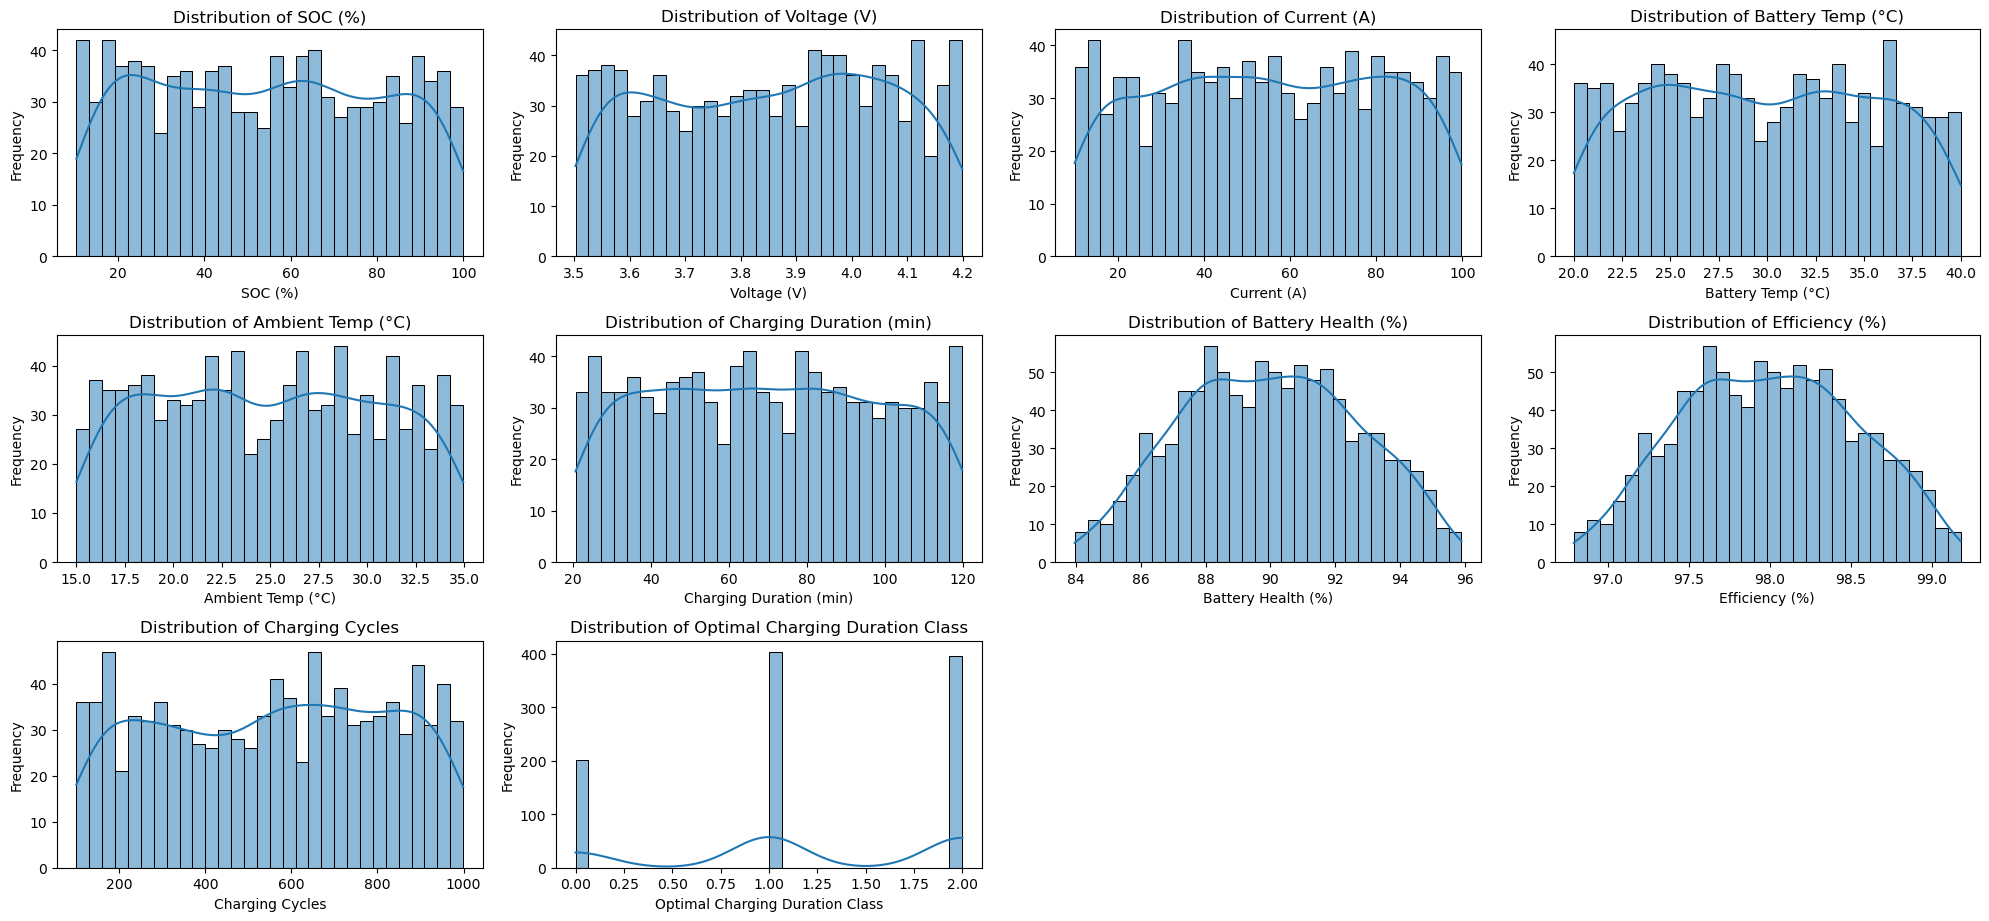

In [65]:
# Numerical Features
# Plot histograms or density plots for numerical features.

numerical_features = ['SOC (%)', 'Voltage (V)', 'Current (A)', 'Battery Temp (°C)', 'Ambient Temp (°C)', 
                      'Charging Duration (min)', 'Battery Health (%)', 'Efficiency (%)', 'Charging Cycles', 
                      'Optimal Charging Duration Class']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.histplot(EV_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

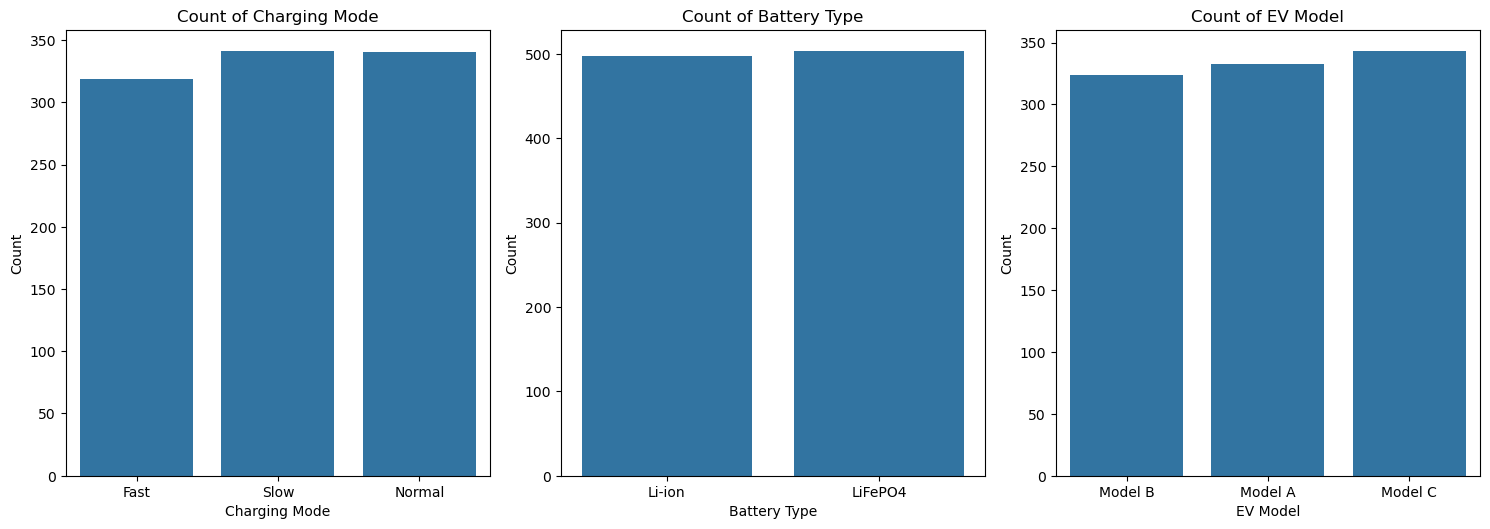

In [66]:
# Categorical Features
# Plot bar charts for categorical features.

categorical_features = ['Charging Mode', 'Battery Type', 'EV Model']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=EV_data, x=feature)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


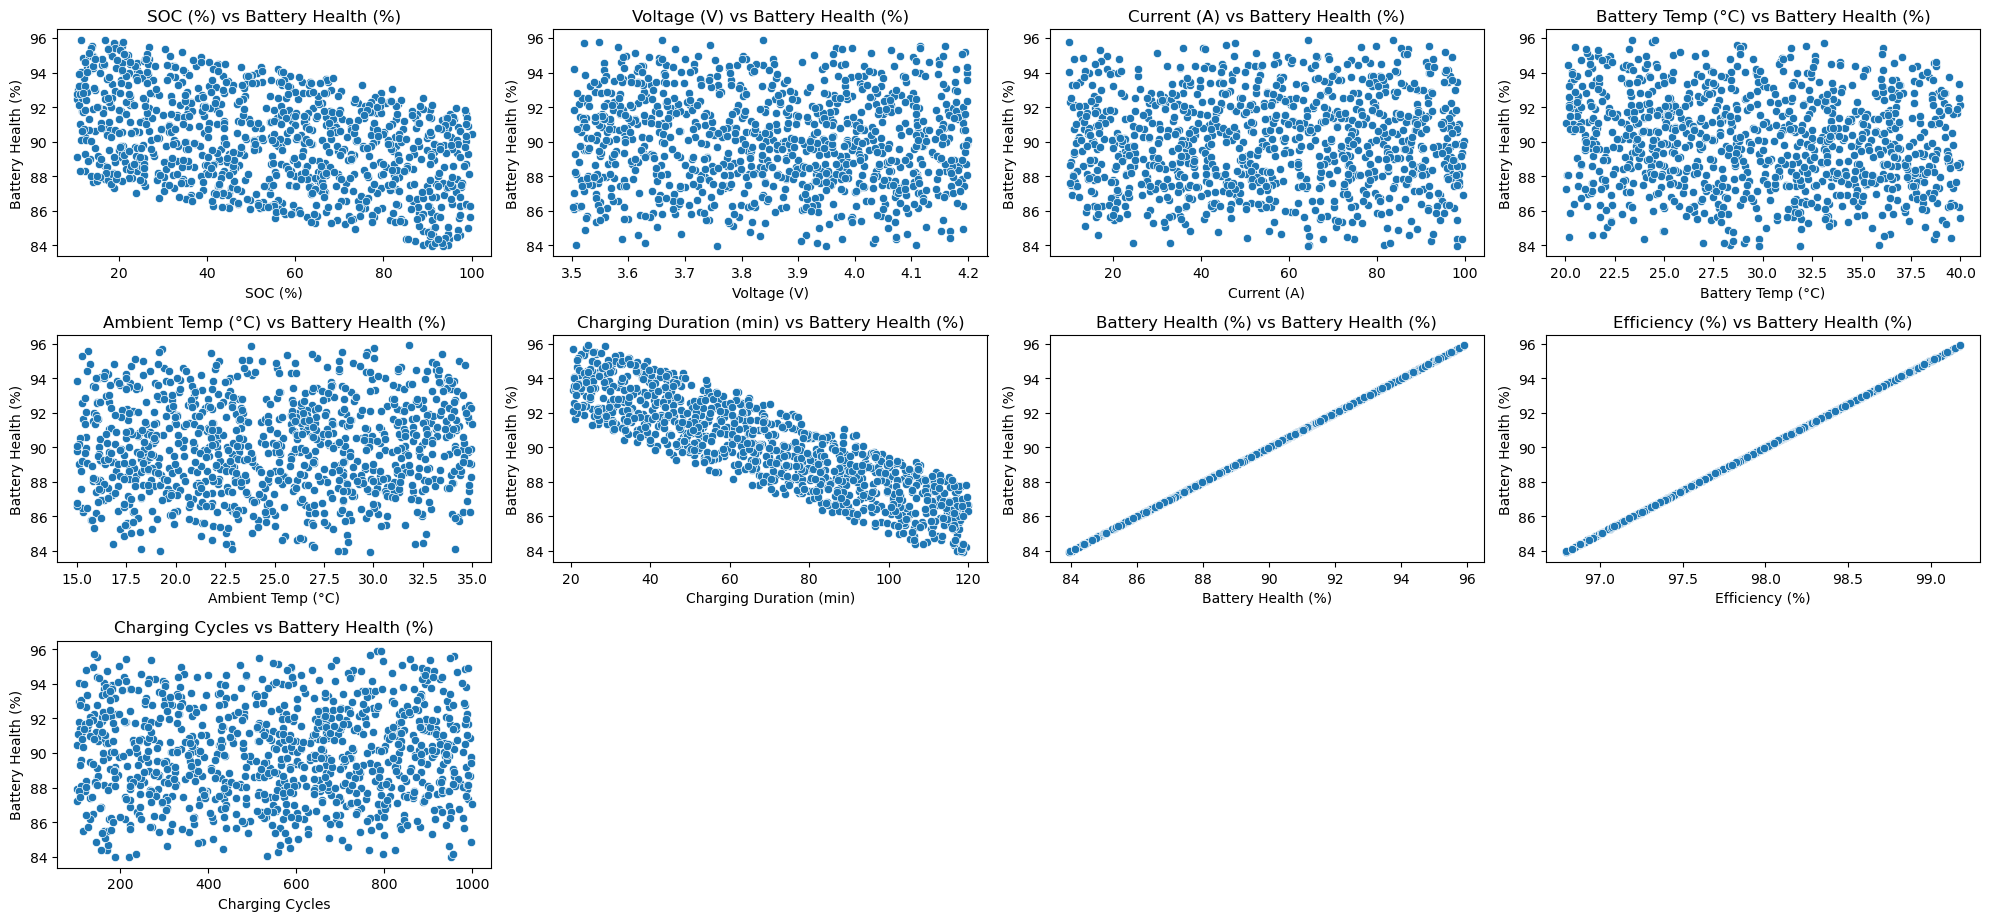

In [67]:
# Numerical Features vs Target
# Use scatter plots to visualize relationships.

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features[:-1], 1):  # Exclude 'Battery Health (%)'
    plt.subplot(5, 4, i)
    sns.scatterplot(data=EV_data, x=feature, y='Battery Health (%)')
    plt.title(f'{feature} vs Battery Health (%)')
    plt.xlabel(feature)
    plt.ylabel('Battery Health (%)')
plt.tight_layout()
plt.show()

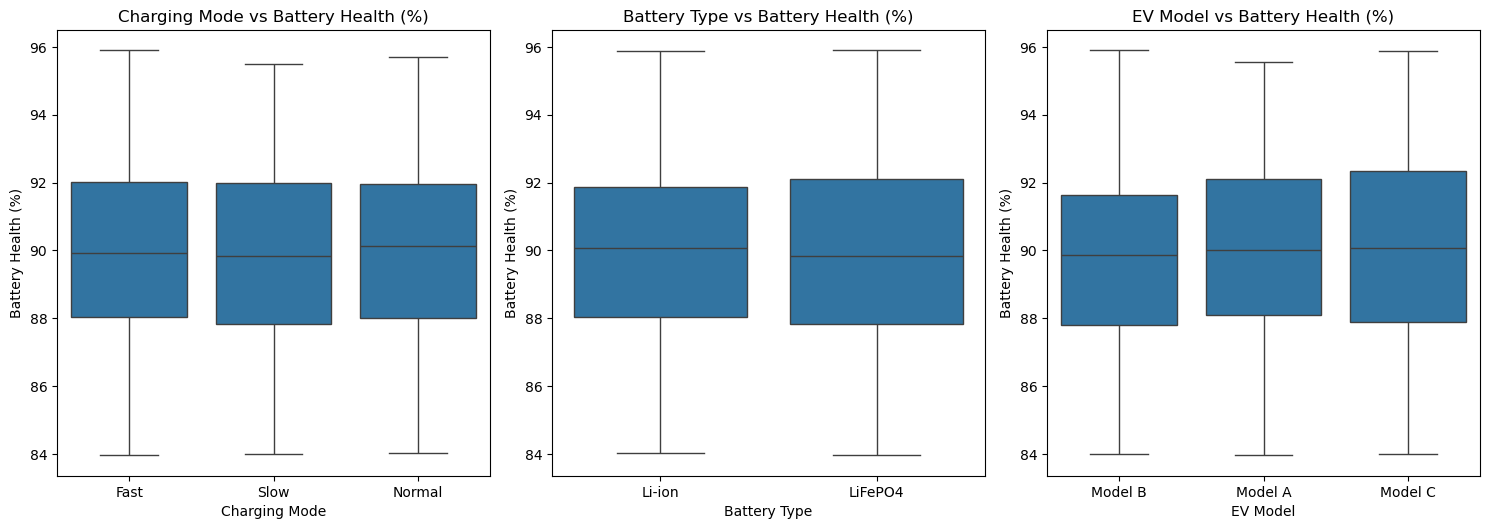

In [68]:
# Categorical Features vs Target
# Use box plots to compare the distribution of the target variable across categories.

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=EV_data, x=feature, y='Battery Health (%)')
    plt.title(f'{feature} vs Battery Health (%)')
    plt.xlabel(feature)
    plt.ylabel('Battery Health (%)')
plt.tight_layout()
plt.show()

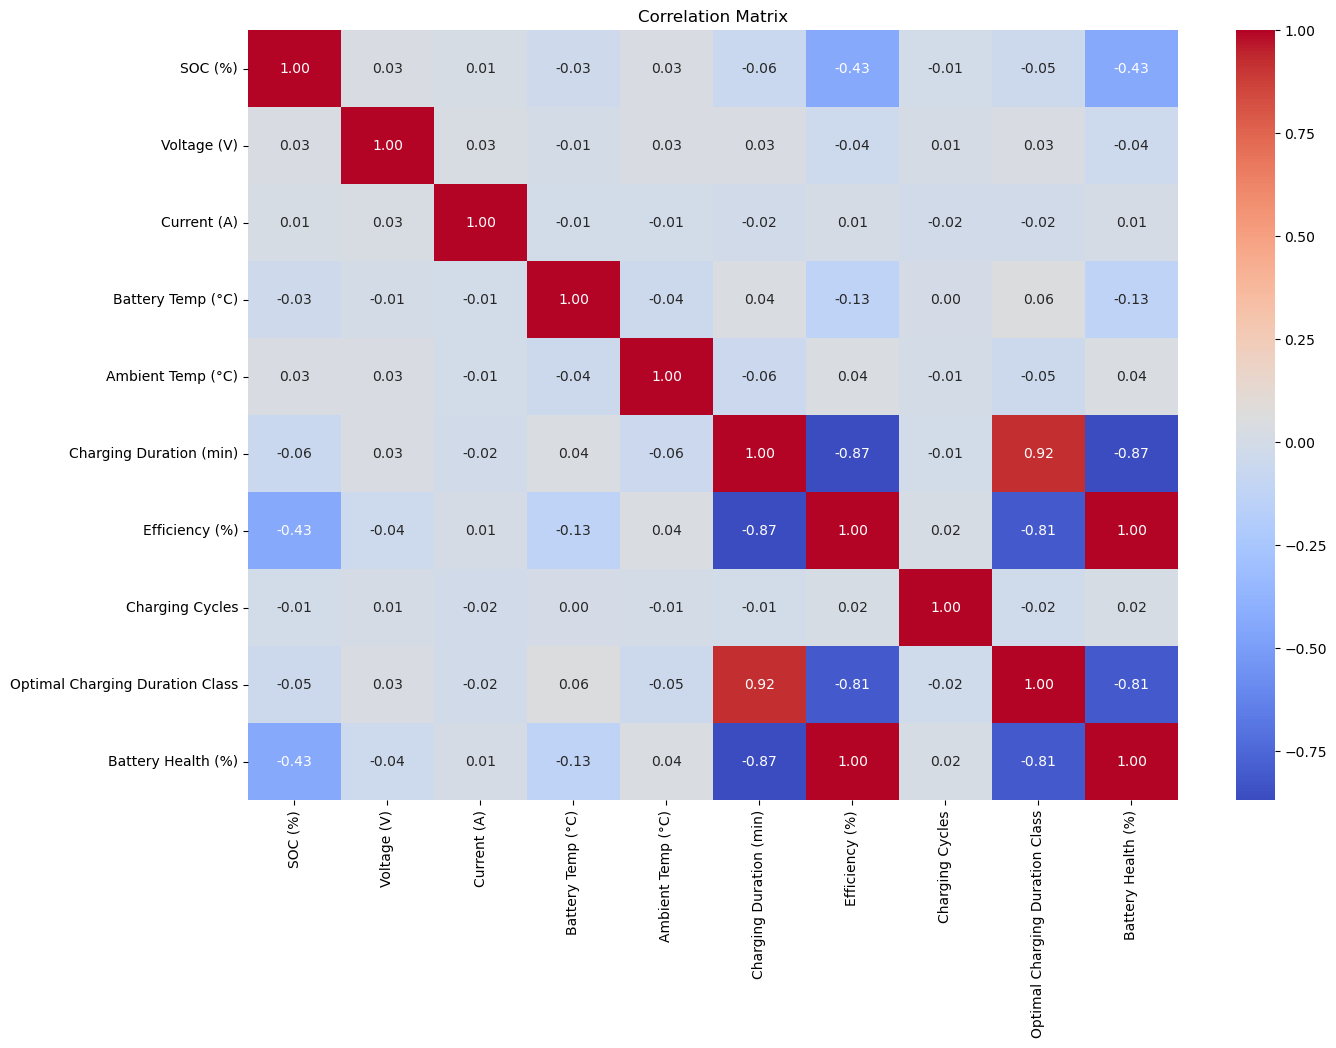

Battery Health (%)                 1.000000
Efficiency (%)                     1.000000
Ambient Temp (°C)                  0.037721
Charging Cycles                    0.016808
Current (A)                        0.012550
Voltage (V)                       -0.040471
Battery Temp (°C)                 -0.127583
SOC (%)                           -0.431175
Optimal Charging Duration Class   -0.807085
Charging Duration (min)           -0.868795
Name: Battery Health (%), dtype: float64


In [69]:
# Correlation matrix
corr_matrix = EV_data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Correlation with target variable
corr_with_target = corr_matrix['Battery Health (%)'].sort_values(ascending=False)
print(corr_with_target)

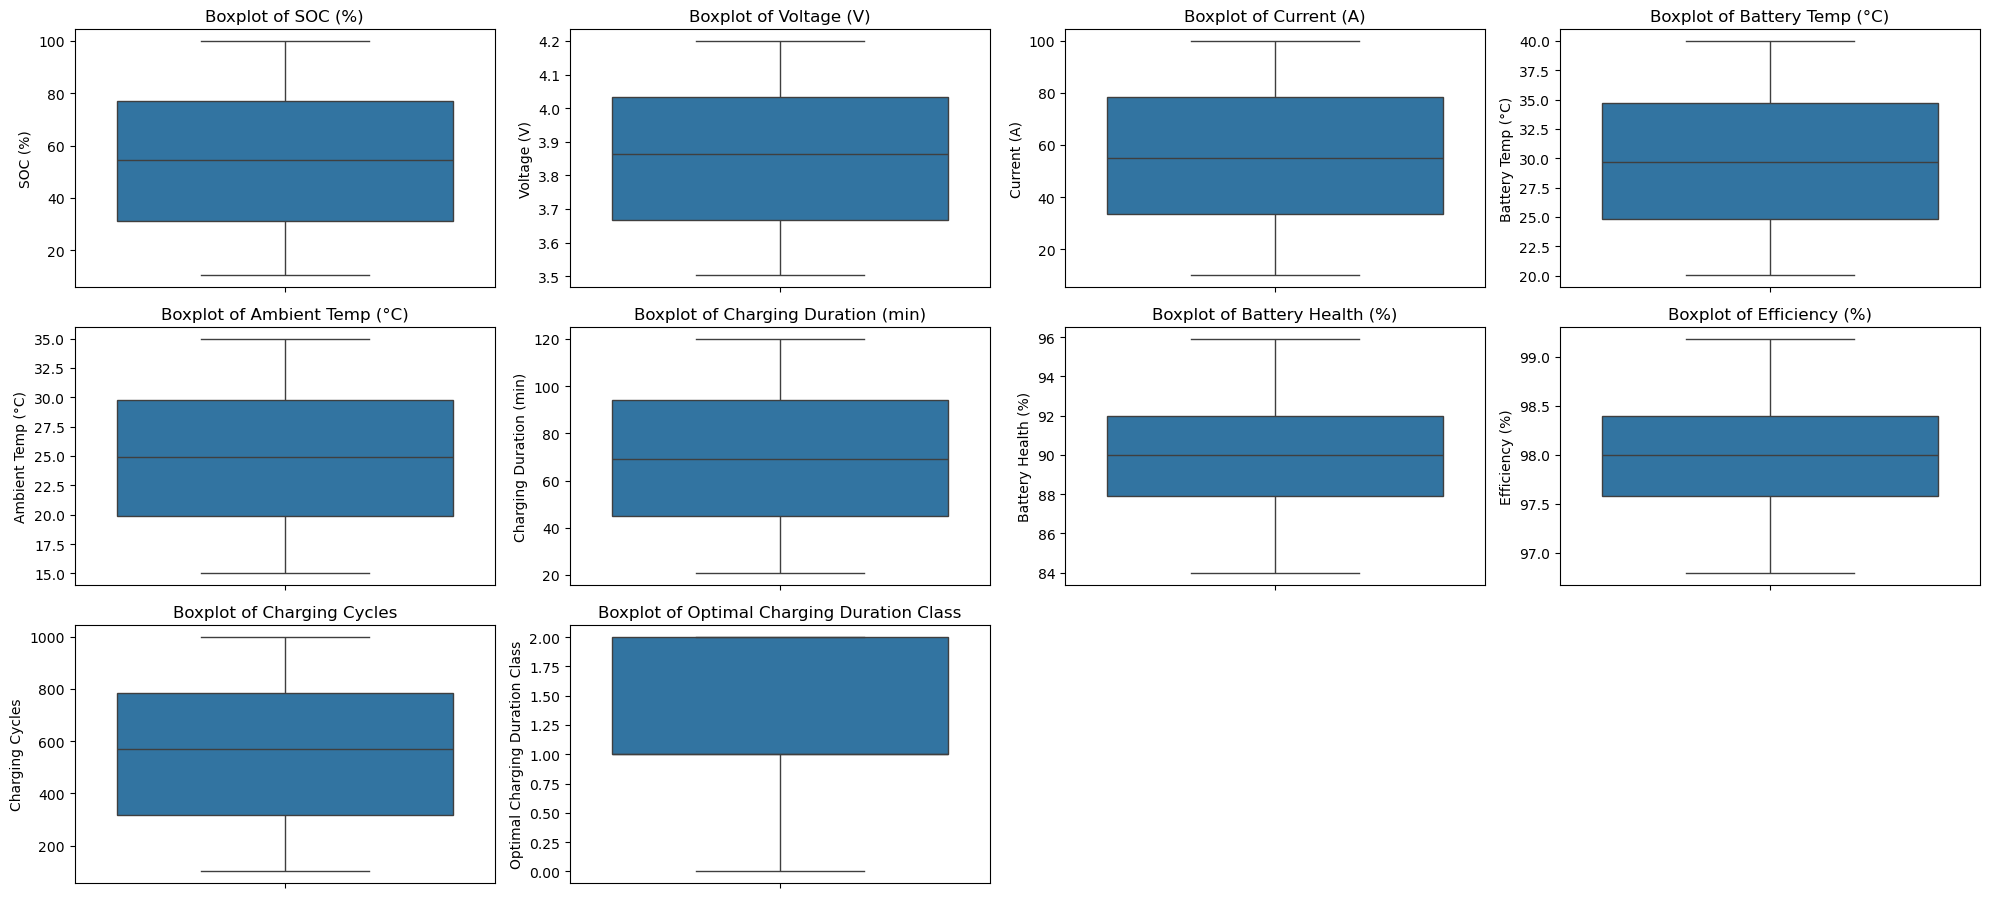

In [70]:
# Outlier Detection
# Identify outliers in the dataset using box plots or statistical methods.

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=EV_data, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

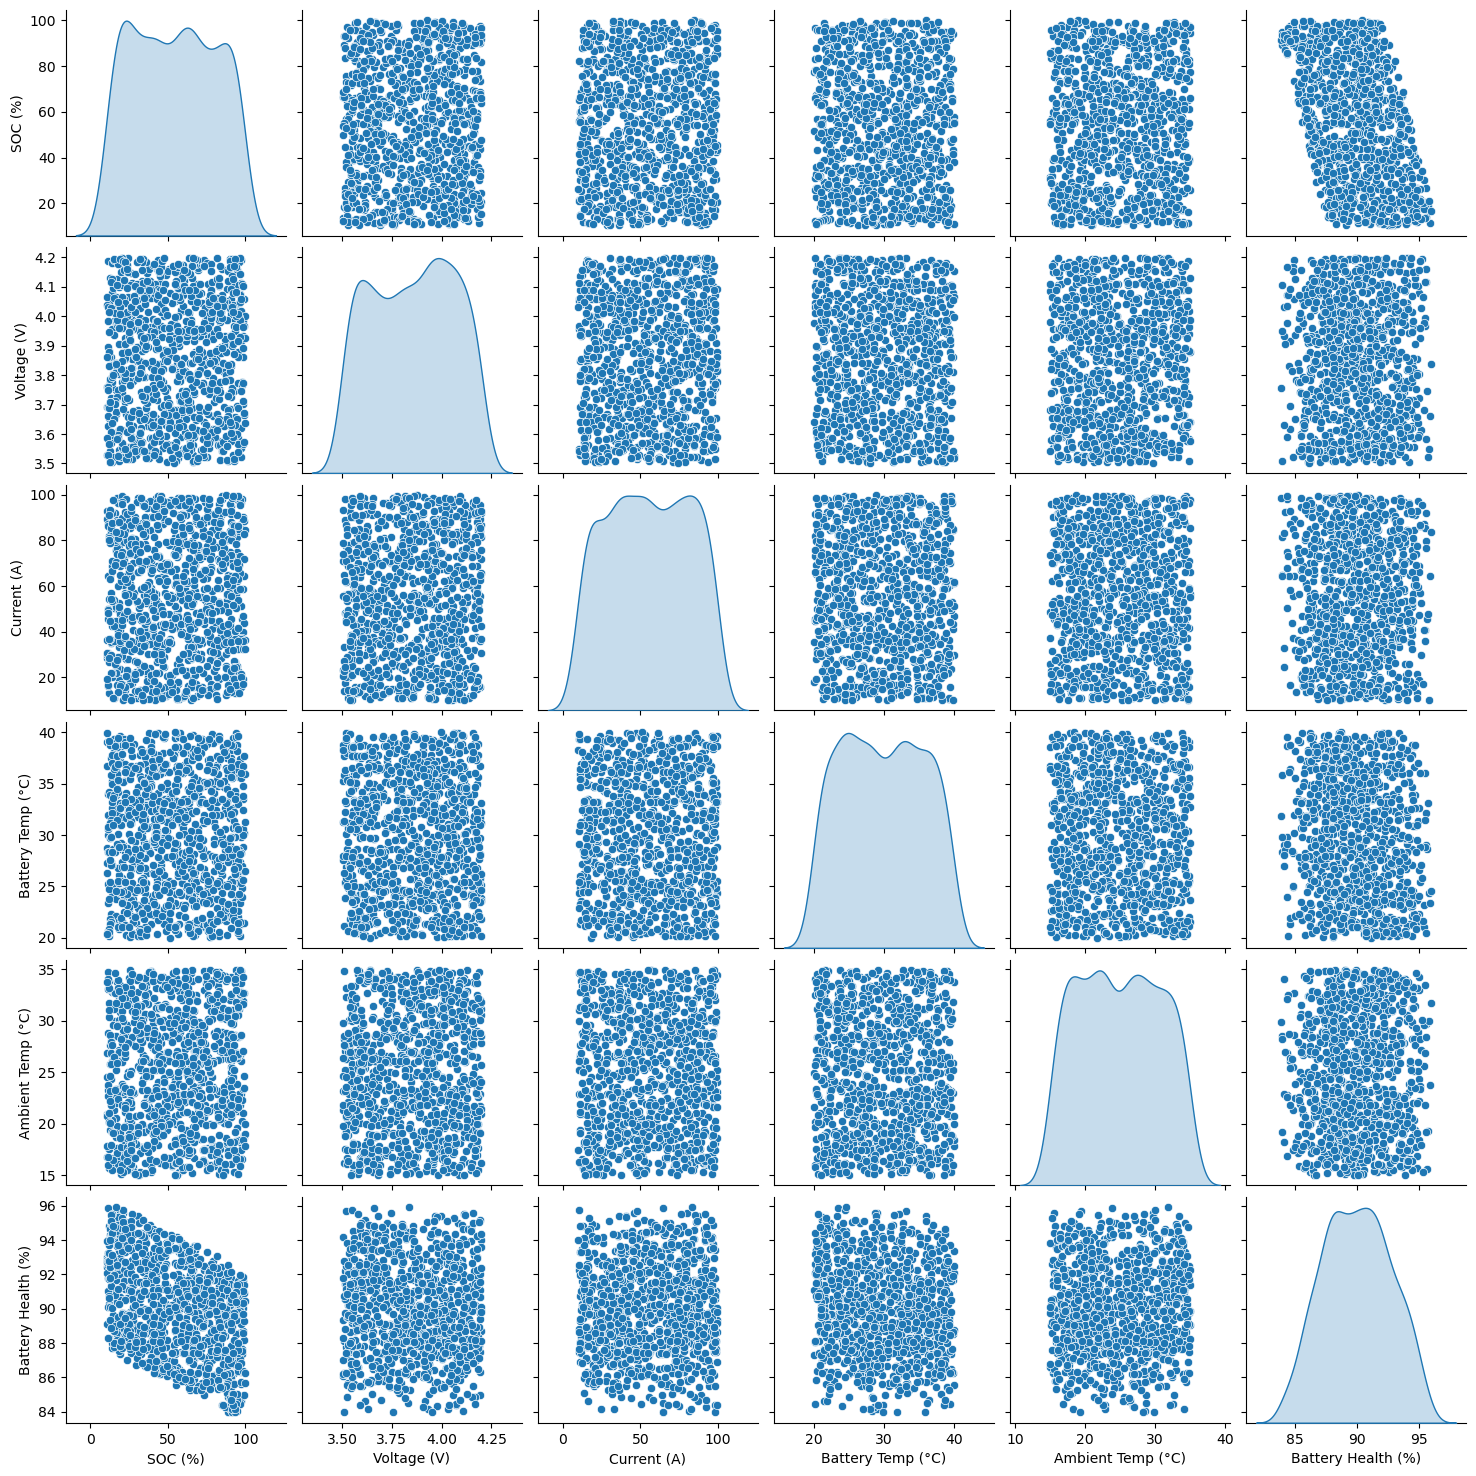

In [71]:
# Pairplot
# Visualize pairwise relationships between numerical features.
# Pairplot for selected numerical features

sns.pairplot(EV_data[numerical_features[:5] + ['Battery Health (%)']], diag_kind='kde')
plt.show()


<Axes: >

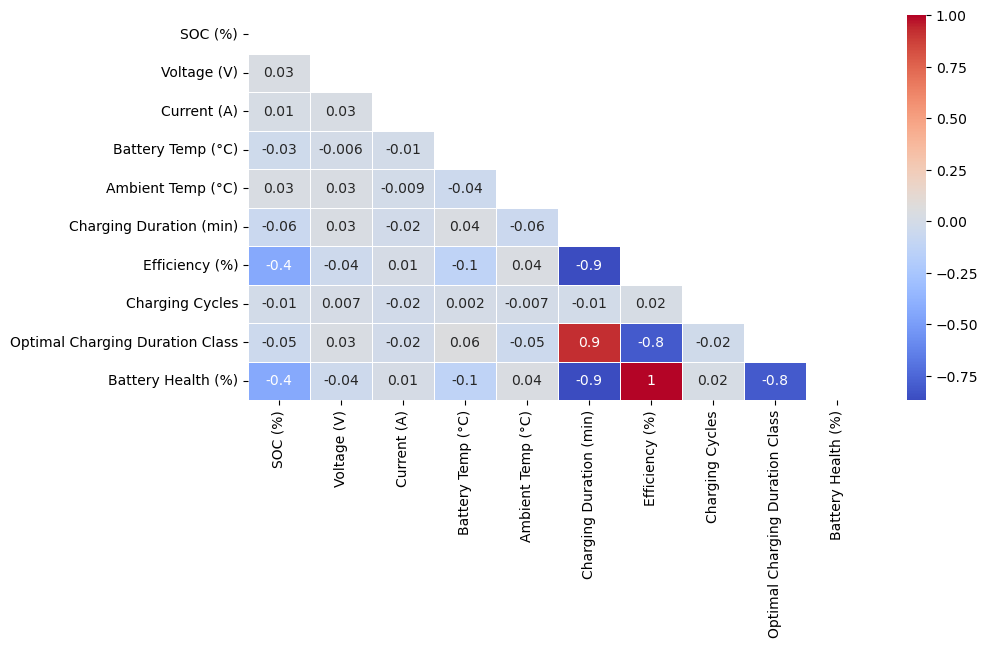

In [72]:
plt.figure(figsize=(10,5), dpi=100)
R_matrix = np.triu(EV_data.corr(numeric_only=True))
sns.heatmap(EV_data.corr(numeric_only=True), mask= R_matrix, cmap='coolwarm',fmt='.1g', annot=True, linewidths=0.5)

In [73]:
## One-Hot Encoding (OHE)

EV_data = pd.get_dummies(EV_data, columns=["Charging Mode",'Battery Type','EV Model'], drop_first=True)
EV_data.head()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Efficiency (%),Charging Cycles,Optimal Charging Duration Class,Battery Health (%),Charging Mode_Normal,Charging Mode_Slow,Battery Type_LiFePO4,EV Model_Model B,EV Model_Model C
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,98.238981,112,1,91.194904,False,False,False,True,False
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,97.562628,398,1,87.813140,False,False,True,False,False
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,97.233533,175,2,86.167664,False,True,True,False,False
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,98.136225,150,1,90.681126,False,False,True,True,False
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,97.662485,886,2,88.312423,False,False,False,False,True


In [74]:
# Convert all boolean columns to int (0/1) # as for removing outlier it need tobe in integer type

EV_data = EV_data.astype({col: int for col in EV_data.select_dtypes(include=['bool']).columns})

EV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Efficiency (%)                   1000 non-null   float64
 7   Charging Cycles                  1000 non-null   int64  
 8   Optimal Charging Duration Class  1000 non-null   int64  
 9   Battery Health (%)               1000 non-null   float64
 10  Charging Mode_Normal             1000 non-null   int64  
 11  Charging Mode_Slow               1000 non-null   int64  
 12  Battery Type_LiFePO4 

In [75]:
## Machine Learning

# Train Regression Models to predict Remaining Life (%)
# Compare Model Performance using:
    # Linear Regression
    # Random Forest
    # XGBoost
# Evaluate Performance using R² Score and RMSE.

# Let’s split the data and train our first model! 


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define features and target variable
X = EV_data.drop(columns=['Battery Health (%)'])
y = EV_data['Battery Health (%)']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

rmse, r2

c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(0.02113697900510442), 0.999931130766123)

In [77]:
# Hyperparameter Tuning (Grid Search)
# To improve accuracy, fine-tune the RandomForestRegressor with GridSearchCV:

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


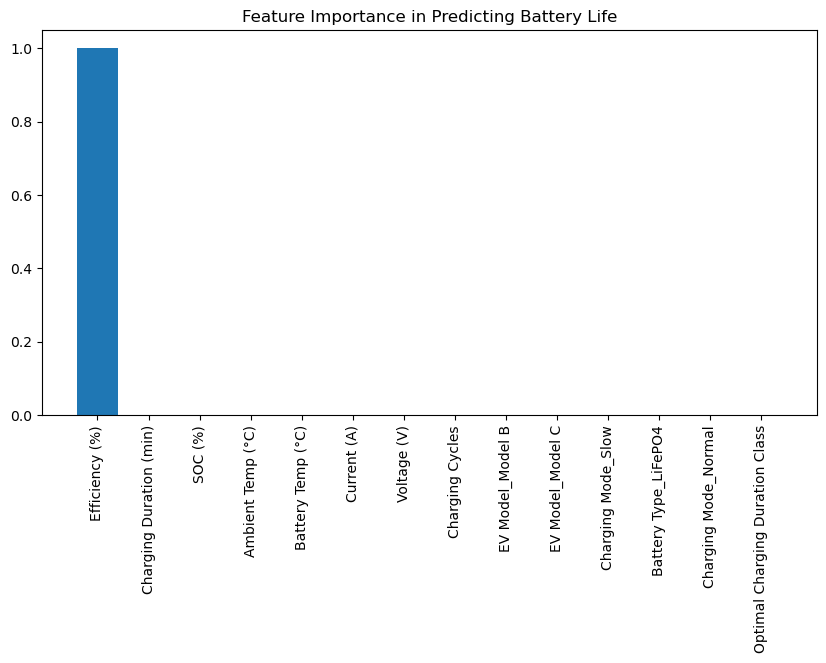

In [78]:
# Feature Importance Analysis
# Identify which features impact battery life predictions the most:

# Get feature importance
importances = best_model.feature_importances_
features = X.columns

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.title("Feature Importance in Predicting Battery Life")
plt.show()

In [79]:
# Model Performance Evaluation
# Compare Random Forest, XGBoost, and Linear Regression using RMSE & R²:

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Random Forest": best_model,
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    "Linear Regression": LinearRegression()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest: RMSE = 0.02, R² = 1.00
XGBoost: RMSE = 0.03, R² = 1.00
Linear Regression: RMSE = 0.00, R² = 1.00


c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


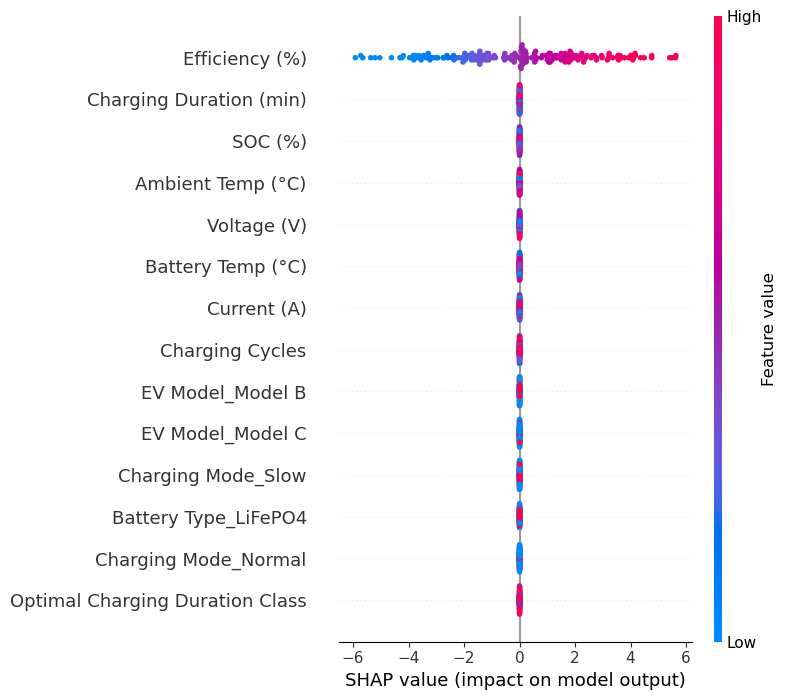

In [81]:
# Explainability with SHAP (Understanding Predictions)
# To interpret model decisions, use SHAP values:

import shap

# Initialize SHAP explainer
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)